In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = {
    'Model': [
        'IndoBERT',
        'RoBERTa',
        'mBERT',
        'DistilBERT'
    ],
    'Time (hours)': [1.2808, 1.2514, 2.0037, 1.0037]
}

df_time = pd.DataFrame(data)

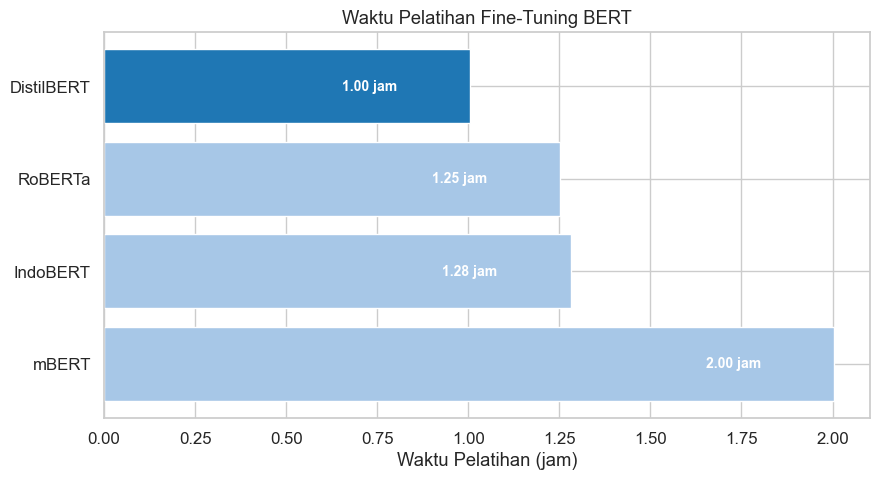

In [4]:
import matplotlib.pyplot as plt

df_time = df_time.sort_values(by='Time (hours)', ascending=False).reset_index(drop=True)

# Temukan waktu pelatihan tercepat (minimum)
min_time = df_time['Time (hours)'].min()

# Warna default dan warna highlight
default_color = '#A7C7E7' 
highlight_color = '#1F77B4'  # biru (training tercepat)

bar_colors = [
    highlight_color if t == min_time else default_color 
    for t in df_time['Time (hours)']
]

plt.figure(figsize=(9,5))
bars = plt.barh(df_time['Model'], df_time['Time (hours)'], color=bar_colors)

max_time = df_time['Time (hours)'].max()

for bar in bars:
    width = bar.get_width()

    text_x = width - (max_time * 0.1)  # menghindari keluar area
    plt.text(text_x,
             bar.get_y() + bar.get_height()/2,
             f"{width:.2f} jam",
             va='center', ha='right',
             fontsize=10, fontweight='bold', color='white')

plt.xlabel("Waktu Pelatihan (jam)")
plt.title("Waktu Pelatihan Fine-Tuning BERT")
plt.tight_layout()
plt.show()


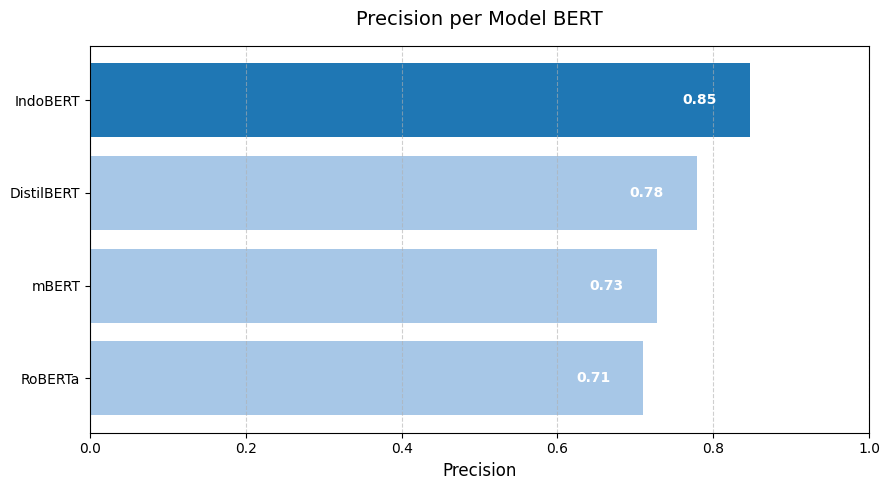

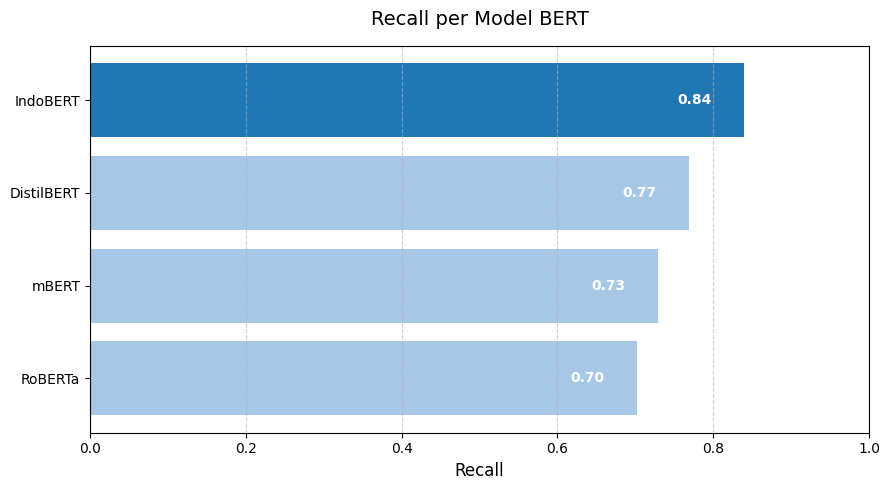

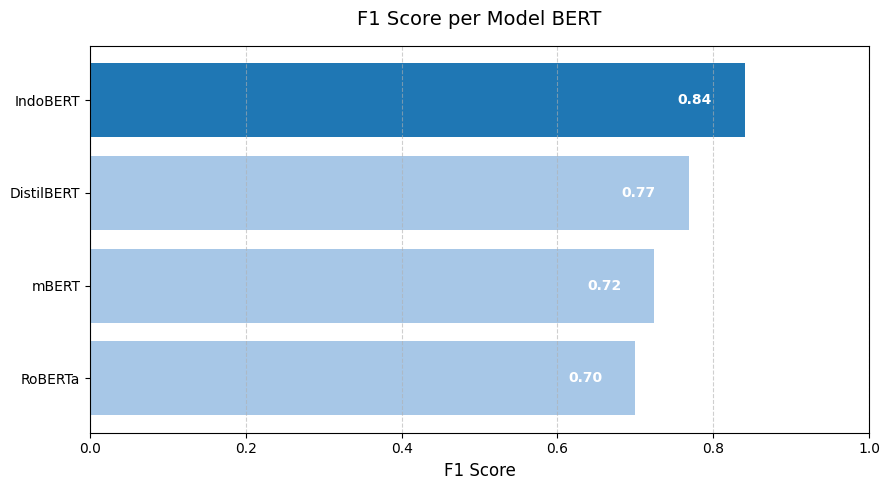

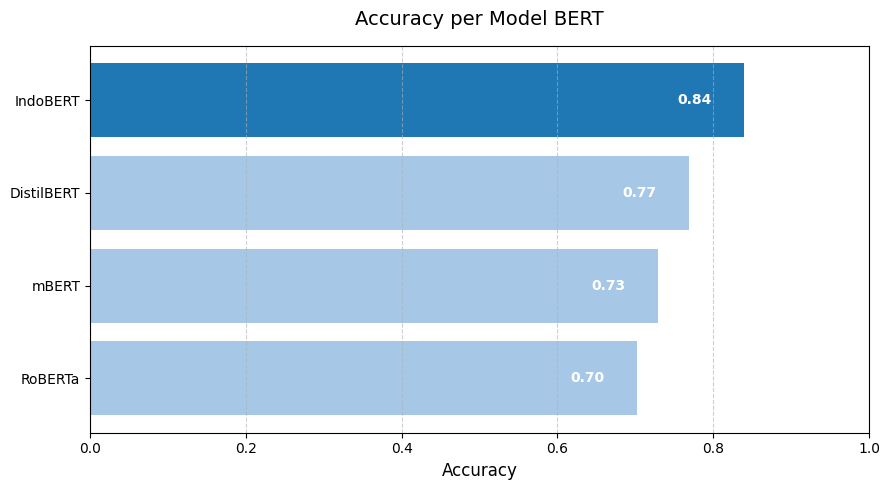

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data_bert = {
    'Model': [
        'IndoBERT',
        'DistilBERT',
        'RoBERTa',
        'mBERT'
    ],
    'Precision': [0.8469, 0.7792, 0.7101, 0.7272],
    'Recall':    [0.8400, 0.7689, 0.7022, 0.7289],
    'F1 Score':  [0.8402, 0.7685, 0.6993, 0.7238],
    'Accuracy':  [0.8400, 0.7689, 0.7022, 0.7289]
}

df_bert = pd.DataFrame(data_bert)

highlight_color = '#1F77B4'  # biru mencolok
default_color   = '#A7C7E7'  # biru pastel

def plot_metric(df, metric_name, ylabel, title_suffix):
    df_sorted = df.sort_values(by=metric_name, ascending=False).reset_index(drop=True)

    max_value = df_sorted[metric_name].max()
    bar_colors = [
        highlight_color if v == max_value else default_color
        for v in df_sorted[metric_name]
    ]

    plt.figure(figsize=(9,5))
    bars = plt.barh(df_sorted['Model'], df_sorted[metric_name], color=bar_colors)
    plt.gca().invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        text_x = width - (max_value * 0.05)

        if width < max_value * 0.15:
            text_x = width + (max_value * 0.02)
            ha = 'left'
        else:
            ha = 'right'

        plt.text(text_x,
         bar.get_y() + bar.get_height()/2,
         f"{width:.2f}",
         va='center', ha=ha,
         fontsize=10, color='white', fontweight='bold')  # ⬅ tambahan fontweight

    plt.xlabel(ylabel, fontsize=12)
    plt.title(f'{ylabel} per Model {title_suffix}', fontsize=14, pad=15)
    plt.xlim(0, 1.0)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

for metric in ['Precision', 'Recall', 'F1 Score', 'Accuracy']:
    plot_metric(df_bert, metric, metric, 'BERT')

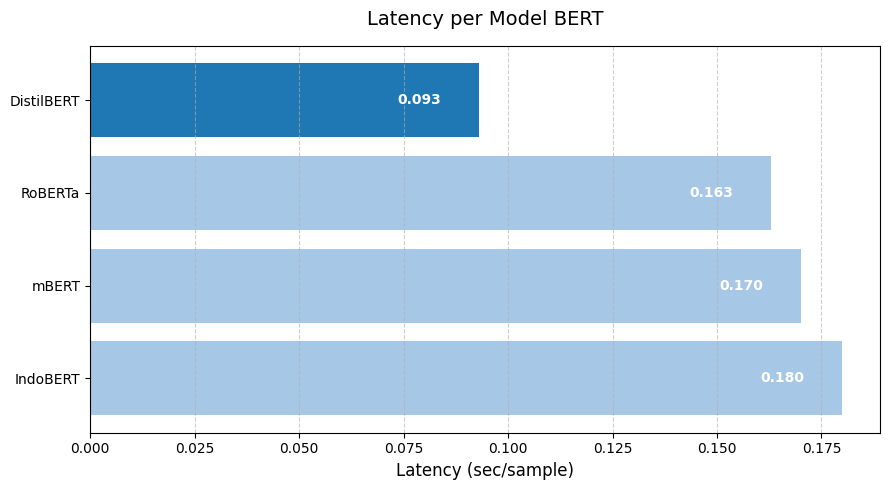

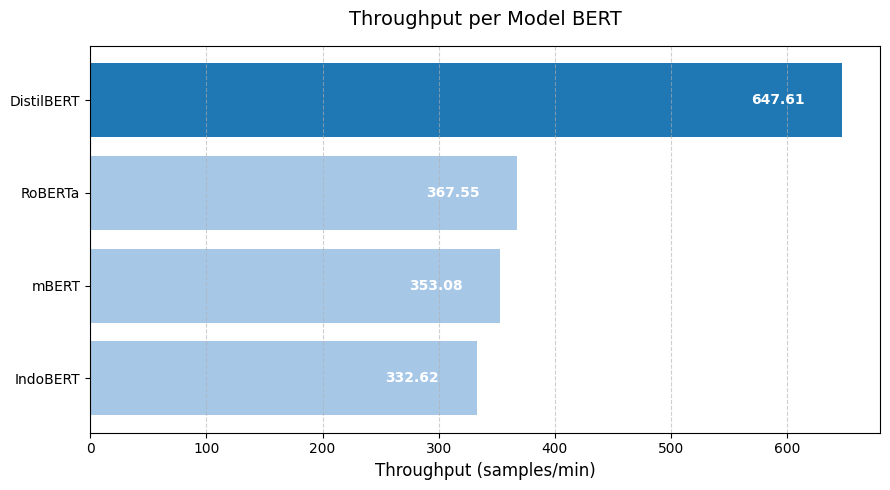

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data_perf = {
    'Model': [
        'IndoBERT',
        'DistilBERT',
        'RoBERTa',
        'mBERT'
    ],
    'Latency (s/sample)': [0.180, 0.093, 0.163, 0.170],
    'Throughput (sample/min)': [332.62, 647.61, 367.55, 353.08]
}

df_perf = pd.DataFrame(data_perf)

highlight_color = '#1F77B4'  # biru mencolok
default_color   = '#A7C7E7'  # biru pastel lembut


def plot_metric(df, metric_name, ylabel, title_suffix, mode='max'):
    df_sorted = df.sort_values(by=metric_name, ascending=(mode=='min')).reset_index(drop=True)

    best_value = df_sorted[metric_name].min() if mode == 'min' else df_sorted[metric_name].max()

    bar_colors = [
        highlight_color if v == best_value else default_color
        for v in df_sorted[metric_name]
    ]

    max_value = df_sorted[metric_name].max()

    plt.figure(figsize=(9,5))
    bars = plt.barh(df_sorted['Model'], df_sorted[metric_name], color=bar_colors)
    plt.gca().invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        text_x = width - (max_value * 0.05)

        if width < max_value * 0.15:
            text_x = width + (max_value * 0.02)
            ha = 'left'
        else:
            ha = 'right'

        fmt = "{:.3f}" if "Latency" in metric_name else "{:.2f}"

        plt.text(text_x,
                 bar.get_y() + bar.get_height()/2,
                 fmt.format(width),
                 va='center', ha=ha,
                 fontsize=10, color='white', fontweight='bold')

    # ===== Title tanpa satuan =====
    title_clean = metric_name.split(" (")[0]   # hapus satuan dalam kurung
    plt.title(f'{title_clean} per Model {title_suffix}', fontsize=14, pad=15)

    # ===== X label tetap ada satuannya =====
    plt.xlabel(ylabel, fontsize=12)

    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# Plot
plot_metric(df_perf, 'Latency (s/sample)', 'Latency (sec/sample)', 'BERT', mode='min')
plot_metric(df_perf, 'Throughput (sample/min)', 'Throughput (samples/min)', 'BERT', mode='max')

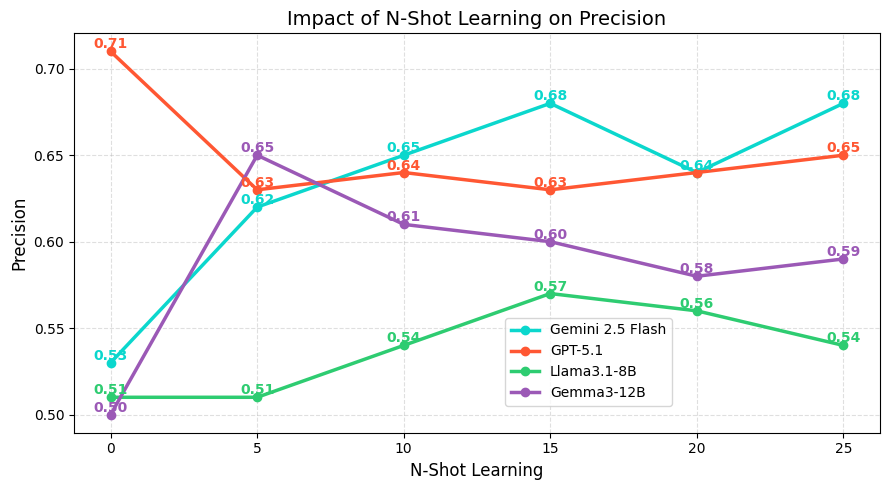

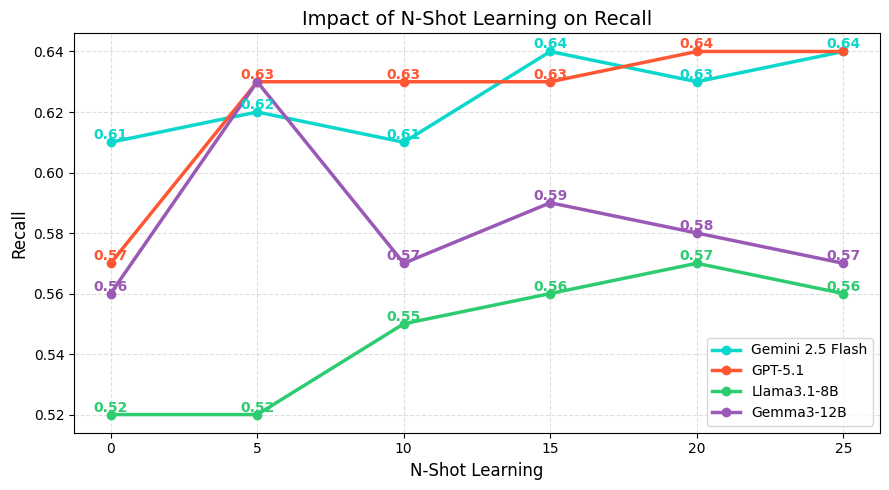

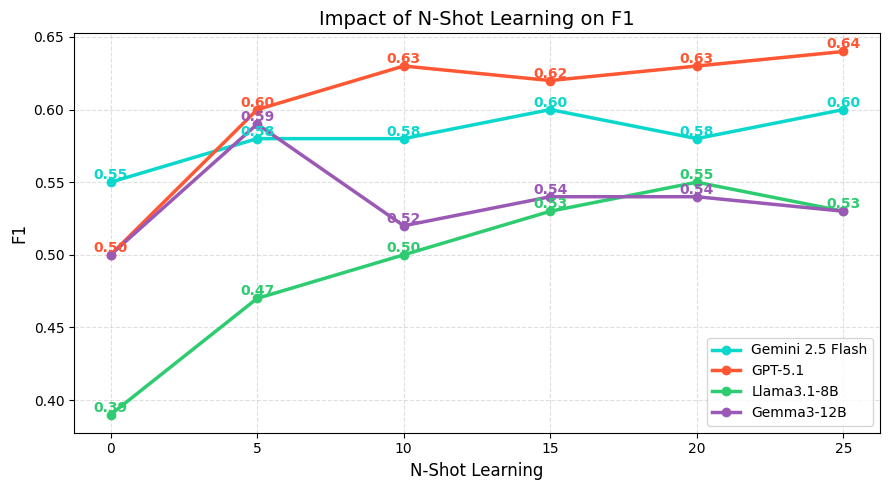

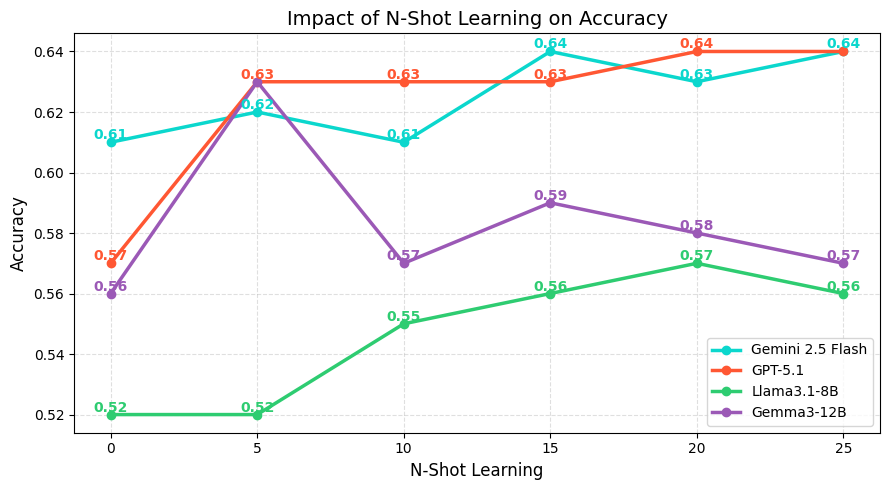

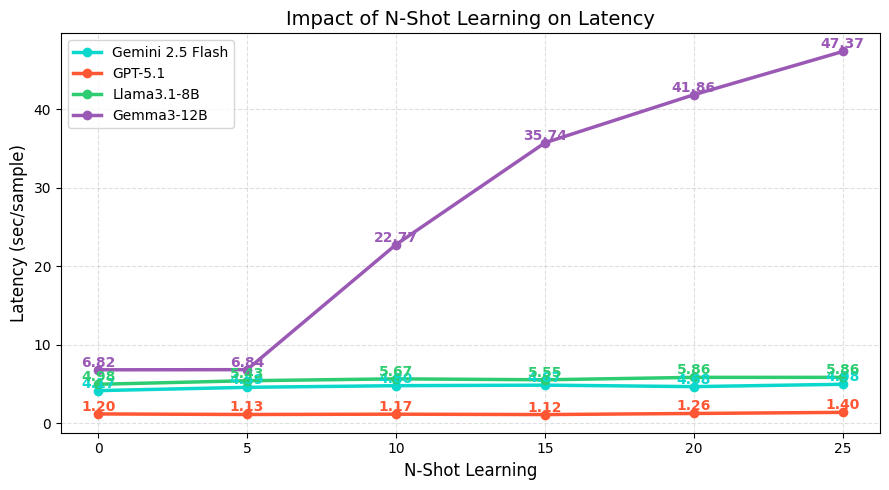

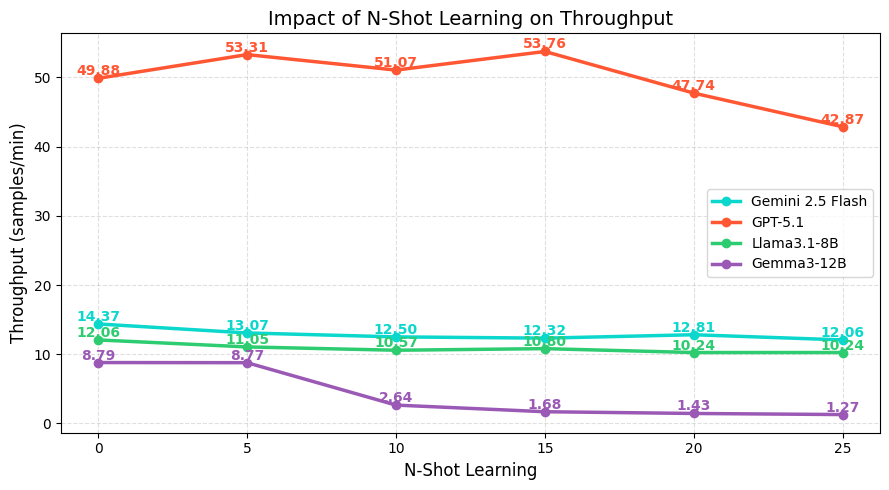

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
shots = [0, 5, 10, 15, 20, 25]

models = {
    "Gemini 2.5 Flash": {
        "Precision":  [0.53, 0.62, 0.65, 0.68, 0.64, 0.68],
        "Recall":     [0.61, 0.62, 0.61, 0.64, 0.63, 0.64],
        "F1":         [0.55, 0.58, 0.58, 0.60, 0.58, 0.60],
        "Accuracy":   [0.61, 0.62, 0.61, 0.64, 0.63, 0.64],
        "Latency":    [4.17, 4.59, 4.80, 4.87, 4.68, 4.98],
        "Throughput": [14.37, 13.07, 12.50, 12.32, 12.81, 12.06]
    },
    "GPT-5.1": {
        "Precision":  [0.71, 0.63, 0.64, 0.63, 0.64, 0.65],
        "Recall":     [0.57, 0.63, 0.63, 0.63, 0.64, 0.64],
        "F1":         [0.50, 0.60, 0.63, 0.62, 0.63, 0.64],
        "Accuracy":   [0.57, 0.63, 0.63, 0.63, 0.64, 0.64],
        "Latency":    [1.20, 1.13, 1.17, 1.12, 1.26, 1.40],
        "Throughput": [49.88, 53.31, 51.07, 53.76, 47.74, 42.87]
    },
    "Llama3.1-8B": {
        "Precision":  [0.51, 0.51, 0.54, 0.57, 0.56, 0.54],
        "Recall":     [0.52, 0.52, 0.55, 0.56, 0.57, 0.56],
        "F1":         [0.39, 0.47, 0.50, 0.53, 0.55, 0.53],
        "Accuracy":   [0.52, 0.52, 0.55, 0.56, 0.57, 0.56],
        "Latency":    [4.98, 5.43, 5.67, 5.55, 5.86, 5.86],
        "Throughput": [12.06, 11.05, 10.57, 10.80, 10.24, 10.24]
    },
    "Gemma3-12B": {
        "Precision":  [0.50, 0.65, 0.61, 0.60, 0.58, 0.59],
        "Recall":     [0.56, 0.63, 0.57, 0.59, 0.58, 0.57],
        "F1":         [0.50, 0.59, 0.52, 0.54, 0.54, 0.53],
        "Accuracy":   [0.56, 0.63, 0.57, 0.59, 0.58, 0.57],
        "Latency":    [6.82, 6.84, 22.77, 35.74, 41.86, 47.37],
        "Throughput": [8.79, 8.77, 2.64, 1.68, 1.43, 1.27]
    }
}

colors = {
    "Gemini 2.5 Flash": "#0BD7CD",
    "GPT-5.1": "#FF5733",           # merah terang
    "Llama3.1-8B": "#2ECC71",       # hijau cerah
    "Gemma3-12B": "#9B59B6"         # ungu terang
}

metrics = ["Precision", "Recall", "F1", "Accuracy", "Latency", "Throughput"]

def plot_metric(metric):
    plt.figure(figsize=(9,5))

    # Plot garis model
    for model, values in models.items():
        plt.plot(shots, values[metric], marker='o', linewidth=2.5,
                 label=model, color=colors[model])

    # Tambahkan teks nilai, hindari duplikat
    for i, shot in enumerate(shots):
        shown_values = set()
        for model, values in models.items():
            value = values[metric][i]
            if value in shown_values:
                continue
            shown_values.add(value)
            plt.text(
                shot, value,
                f"{value:.2f}",
                fontsize=10, fontweight='bold',
                ha='center', va='bottom',
                color=colors[model]
            )

    # Title & label
    plt.title(f"Impact of N-Shot Learning on {metric}", fontsize=14)
    plt.xlabel("N-Shot Learning", fontsize=12)
    if metric == "Latency":
        plt.ylabel("Latency (sec/sample)", fontsize=12)
    elif metric == "Throughput":
        plt.ylabel("Throughput (samples/min)", fontsize=12)
    else:
        plt.ylabel(metric, fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.4)
    plt.xticks(shots)

    # Legend
    if metric == "Precision":
        plt.legend(loc='lower right', bbox_to_anchor=(0.75, 0.05))
    else:
        plt.legend()

    plt.tight_layout()
    plt.show()

# Generate plots
for m in metrics:
    plot_metric(m)


In [2]:
import pandas as pd
from scipy.stats import pearsonr

# Siapkan DataFrame
data = []
for model, values in models.items():
    for i, shot in enumerate(shots):
        data.append({
            "Model": model,
            "Shots": shot,
            "F1": values["F1"][i],
            "Accuracy": values["Accuracy"][i]
        })

df = pd.DataFrame(data)

# Fungsi hitung korelasi per model
def compute_correlation(df, metric):
    results = {}
    for model in df['Model'].unique():
        subset = df[df['Model'] == model]
        corr, p_value = pearsonr(subset['Shots'], subset[metric])
        results[model] = {"Pearson Correlation": corr, "p-value": p_value}
    return pd.DataFrame(results).T

# Korelasi jumlah shot terhadap F1
f1_corr = compute_correlation(df, "F1")
print("Korelasi Shots vs F1 Score:")
print(f1_corr, "\n")

# Korelasi jumlah shot terhadap Accuracy
acc_corr = compute_correlation(df, "Accuracy")
print("Korelasi Shots vs Accuracy:")
print(acc_corr)

Korelasi Shots vs F1 Score:
                  Pearson Correlation   p-value
Gemini 2.5 Flash             0.786556  0.063475
GPT-5.1                      0.795532  0.058437
Llama3.1-8B                  0.885300  0.018980
Gemma3-12B                   0.035504  0.946767 

Korelasi Shots vs Accuracy:
                  Pearson Correlation   p-value
Gemini 2.5 Flash             0.814345  0.048502
GPT-5.1                      0.764086  0.076918
Llama3.1-8B                  0.890769  0.017245
Gemma3-12B                  -0.170820  0.746263


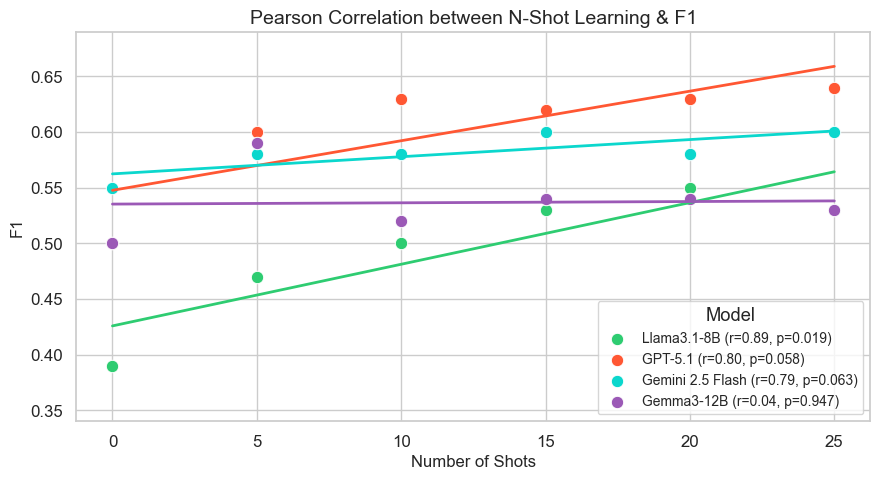

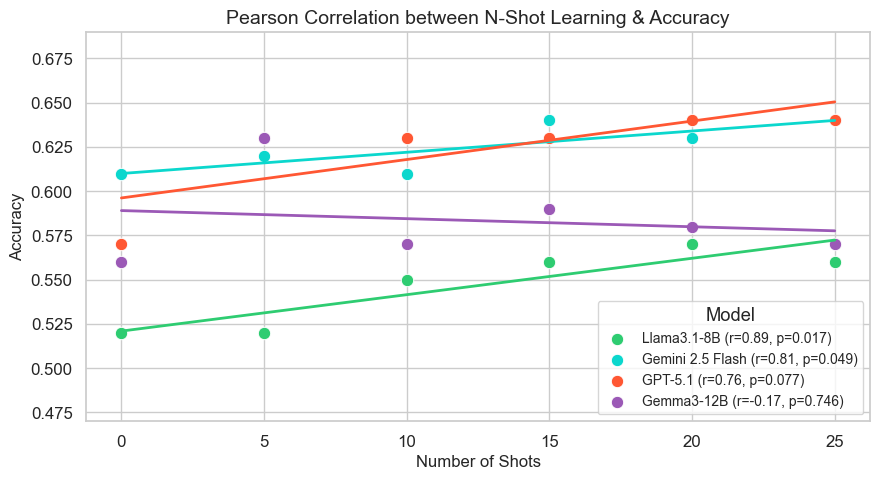

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(style="whitegrid", font_scale=1.1)
metrics_to_plot = ["F1", "Accuracy"]

colors = {
    "Gemini 2.5 Flash": "#0BD7CD",
    "GPT-5.1": "#FF5733",
    "Llama3.1-8B": "#2ECC71",
    "Gemma3-12B": "#9B59B6"
}

for metric in metrics_to_plot:
    fig, ax = plt.subplots(figsize=(9,5))
    
    # Hitung Pearson r
    r_dict = {}
    p_dict = {}
    for model in df['Model'].unique():
        subset = df[df['Model'] == model]
        r, p = pearsonr(subset['Shots'], subset[metric])
        r_dict[model] = r
        p_dict[model] = p
    
    # Urutkan model berdasarkan r menurun
    sorted_models = sorted(r_dict.keys(), key=lambda x: r_dict[x], reverse=True)
    
    # Plot scatter + regplot
    for model in sorted_models:
        subset = df[df['Model'] == model]
        label_text = f"{model} (r={r_dict[model]:.2f}, p={p_dict[model]:.3f})"
        
        sns.scatterplot(x="Shots", y=metric, data=subset, s=80, 
                        color=colors[model], label=label_text, ax=ax)
        sns.regplot(x="Shots", y=metric, data=subset, scatter=False, ci=None,
                    line_kws={"color": colors[model], "lw":2}, ax=ax)
    
    ax.set_title(f"Pearson Correlation between N-Shot Learning & {metric}", fontsize=14)
    ax.set_xlabel("Number of Shots", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xticks(shots)
    ax.set_ylim(df[metric].min() - 0.05, df[metric].max() + 0.05)
    ax.legend(title="Model", fontsize=10)
    plt.tight_layout()
    plt.show()

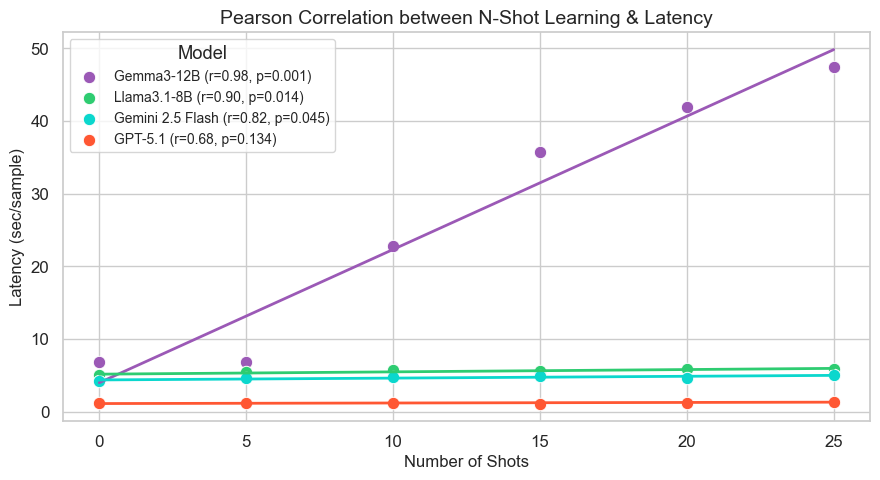

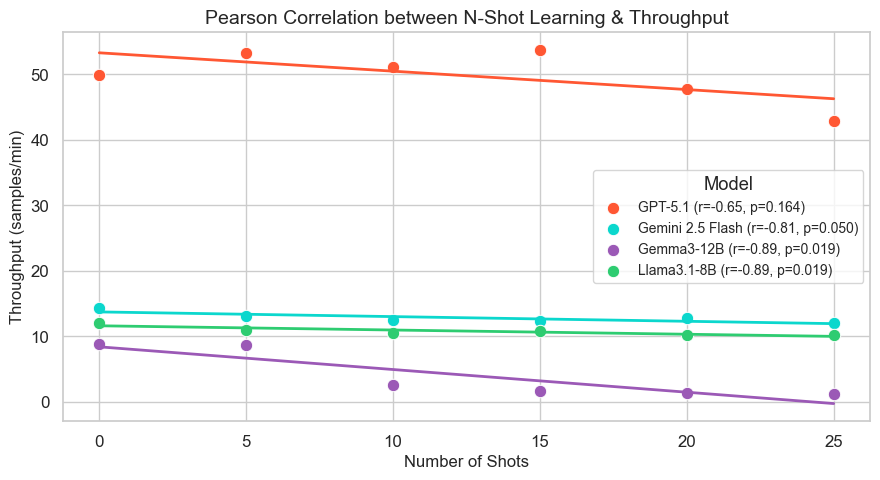

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd

sns.set(style="whitegrid", font_scale=1.1)

# Siapkan DataFrame dari dictionary models
data = []
for model, values in models.items():
    for i, shot in enumerate(shots):
        data.append({
            "Model": model,
            "Shots": shot,
            "Latency": values["Latency"][i],
            "Throughput": values["Throughput"][i]
        })
df_perf = pd.DataFrame(data)

metrics_to_plot = ["Latency", "Throughput"]

colors = {
    "Gemini 2.5 Flash": "#0BD7CD",
    "GPT-5.1": "#FF5733",
    "Llama3.1-8B": "#2ECC71",
    "Gemma3-12B": "#9B59B6"
}

for metric in metrics_to_plot:
    fig, ax = plt.subplots(figsize=(9,5))
    
    # Hitung Pearson r untuk semua model
    r_dict = {}
    p_dict = {}
    for model in df_perf['Model'].unique():
        subset = df_perf[df_perf['Model'] == model]
        r, p = pearsonr(subset['Shots'], subset[metric])
        r_dict[model] = r
        p_dict[model] = p
    
    # Urutkan model berdasarkan r menurun
    sorted_models = sorted(r_dict.keys(), key=lambda x: r_dict[x], reverse=True)
    
    # Plot scatter + regplot
    for model in sorted_models:
        subset = df_perf[df_perf['Model'] == model]
        label_text = f"{model} (r={r_dict[model]:.2f}, p={p_dict[model]:.3f})"
        
        sns.scatterplot(x="Shots", y=metric, data=subset, s=80, 
                        color=colors[model], label=label_text, ax=ax)
        sns.regplot(x="Shots", y=metric, data=subset, scatter=False, ci=None,
                    line_kws={"color": colors[model], "lw":2}, ax=ax)
    
    ax.set_title(f"Pearson Correlation between N-Shot Learning & {metric}", fontsize=14)
    ax.set_xlabel("Number of Shots", fontsize=12)
    ax.set_ylabel(f"{metric} {'(sec/sample)' if metric=='Latency' else '(samples/min)'}", fontsize=12)
    ax.set_xticks(shots)
    ax.legend(title="Model", fontsize=10)
    plt.tight_layout()
    plt.show()


In [2]:
import pandas as pd

shots = [0, 5, 10, 15, 20, 25]

models = {
    "Gemini 2.5 Flash": {
        "Precision":  [0.53, 0.62, 0.65, 0.68, 0.64, 0.68],
        "Recall":     [0.61, 0.62, 0.61, 0.64, 0.63, 0.64],
        "F1":         [0.55, 0.58, 0.58, 0.60, 0.58, 0.60],
        "Accuracy":   [0.61, 0.62, 0.61, 0.64, 0.63, 0.64],
        "Latency":    [4.17, 4.59, 4.80, 4.87, 4.68, 4.98],
        "Throughput": [14.37, 13.07, 12.50, 12.32, 12.81, 12.06]
    },
    "GPT-5.1": {
        "Precision":  [0.71, 0.63, 0.64, 0.63, 0.64, 0.65],
        "Recall":     [0.57, 0.63, 0.63, 0.63, 0.64, 0.64],
        "F1":         [0.50, 0.60, 0.63, 0.62, 0.63, 0.64],
        "Accuracy":   [0.57, 0.63, 0.63, 0.63, 0.64, 0.64],
        "Latency":    [1.20, 1.13, 1.17, 1.12, 1.26, 1.40],
        "Throughput": [49.88, 53.31, 51.07, 53.76, 47.74, 42.87]
    },
    "Llama3.1-8B": {
        "Precision":  [0.51, 0.51, 0.54, 0.57, 0.56, 0.54],
        "Recall":     [0.52, 0.52, 0.55, 0.56, 0.57, 0.56],
        "F1":         [0.39, 0.47, 0.50, 0.53, 0.55, 0.53],
        "Accuracy":   [0.52, 0.52, 0.55, 0.56, 0.57, 0.56],
        "Latency":    [4.98, 5.43, 5.67, 5.55, 5.86, 5.86],
        "Throughput": [12.06, 11.05, 10.57, 10.80, 10.24, 10.24]
    },
    "Gemma3-12B": {
        "Precision":  [0.50, 0.65, 0.61, 0.60, 0.58, 0.59],
        "Recall":     [0.56, 0.63, 0.57, 0.59, 0.58, 0.57],
        "F1":         [0.50, 0.59, 0.52, 0.54, 0.54, 0.53],
        "Accuracy":   [0.56, 0.63, 0.57, 0.59, 0.58, 0.57],
        "Latency":    [6.82, 6.84, 22.77, 35.74, 41.86, 47.37],
        "Throughput": [8.79, 8.77, 2.64, 1.68, 1.43, 1.27]
    }
}

data_perf = {
    'Model': [
        'IndoBERT',
        'DistilBERT',
        'RoBERTa',
        'mBERT',
        'GPT-4.1 nano',
    ],
    'Latency': [0.180, 0.093, 0.163, 0.170, 0.52],
    'Throughput': [332.62, 647.61, 367.55, 353.08, 115.91]
}

data_bert = {
    'Model': [
        'IndoBERT',
        'DistilBERT',
        'RoBERTa',
        'mBERT',
        'GPT-4.1 nano',
    ],
    'Precision': [0.8469, 0.7792, 0.7101, 0.7272, 0.83],
    'Recall':    [0.8400, 0.7689, 0.7022, 0.728, 0.81],
    'F1 Score':  [0.8402, 0.7685, 0.6993, 0.7238, 0.81],
    'Accuracy':  [0.8400, 0.7689, 0.7022, 0.7289, 0.81]
}

# Convert GenAI results into rows
combined_rows = []
for model, metrics in models.items():
    for idx, shot in enumerate(shots):
        combined_rows.append({
            "Model": f"{model} ({shot}-shot)",
            "N-Shot": shot,
            "Precision": metrics["Precision"][idx],
            "Recall": metrics["Recall"][idx],
            "F1 Score": metrics["F1"][idx],
            "Accuracy": metrics["Accuracy"][idx],
            "Latency": metrics["Latency"][idx],
            "Throughput": metrics["Throughput"][idx]
        })

combined_rows.append({
    "Model": "GPT-4.1 nano (25-shot)",
    "N-Shot": 25,
    "Precision": 0.48,
    "Recall": 0.54,
    "F1 Score": 0.48,
    "Accuracy": 0.54,
    "Latency": 0.90,
    "Throughput": 66.88
})

# Add BERT fine-tuning rows with full metrics
for i, model_name in enumerate(data_bert['Model']):
    combined_rows.append({
        "Model": model_name + " (Fine-Tuning)",
        "N-Shot": None,
        "Precision": data_bert['Precision'][i],
        "Recall": data_bert['Recall'][i],
        "F1 Score": data_bert['F1 Score'][i],
        "Accuracy": data_bert['Accuracy'][i],
        "Latency": data_perf['Latency'][i],
        "Throughput": data_perf['Throughput'][i]
    })

df_all = pd.DataFrame(combined_rows)
df_all

,Model,N-Shot,Precision,Recall,F1 Score,Accuracy,Latency,Throughput
0,Gemini 2.5 Flash (0-shot),0.0,0.5300,0.6100,0.5500,0.6100,4.170,14.37
1,Gemini 2.5 Flash (5-shot),5.0,0.6200,0.6200,0.5800,0.6200,4.590,13.07
2,Gemini 2.5 Flash (10-shot),10.0,0.6500,0.6100,0.5800,0.6100,4.800,12.50
3,Gemini 2.5 Flash (15-shot),15.0,0.6800,0.6400,0.6000,0.6400,4.870,12.32
4,Gemini 2.5 Flash (20-shot),20.0,0.6400,0.6300,0.5800,0.6300,4.680,12.81
5,Gemini 2.5 Flash (25-shot),25.0,0.6800,0.6400,0.6000,0.6400,4.980,12.06
6,GPT-5.1 (0-shot),0.0,0.7100,0.5700,0.5000,0.5700,1.200,49.88
7,GPT-5.1 (5-shot),5.0,0.6300,0.6300,0.6000,0.6300,1.130,53.31
8,GPT-5.1 (10-shot),10.0,0.6400,0.6300,0.6300,0.6300,1.170,51.07
9,GPT-5.1 (15-shot),15.0,0.6300,0.6300,0.6200,0.6300,1.120,53.76


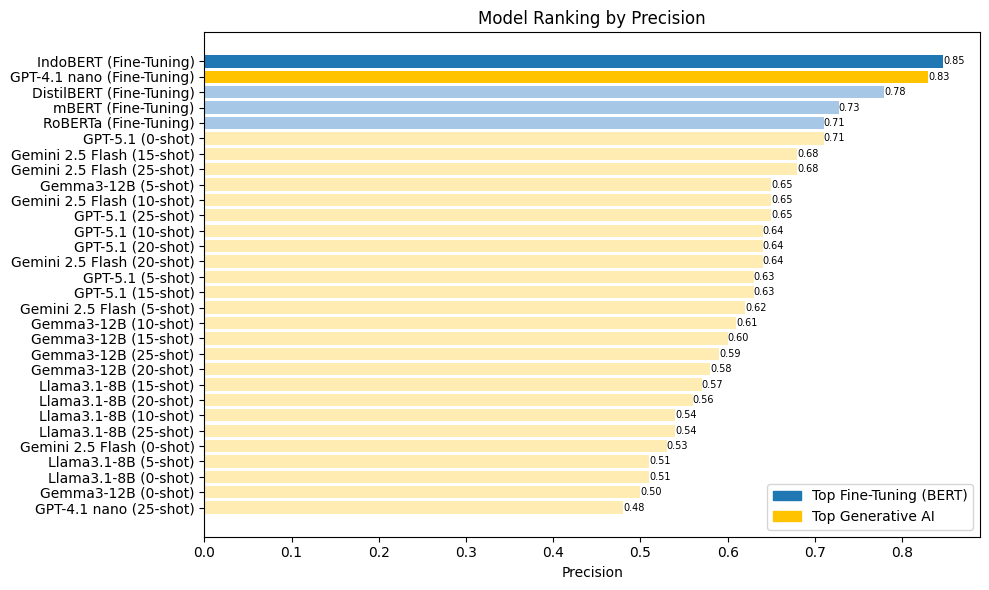

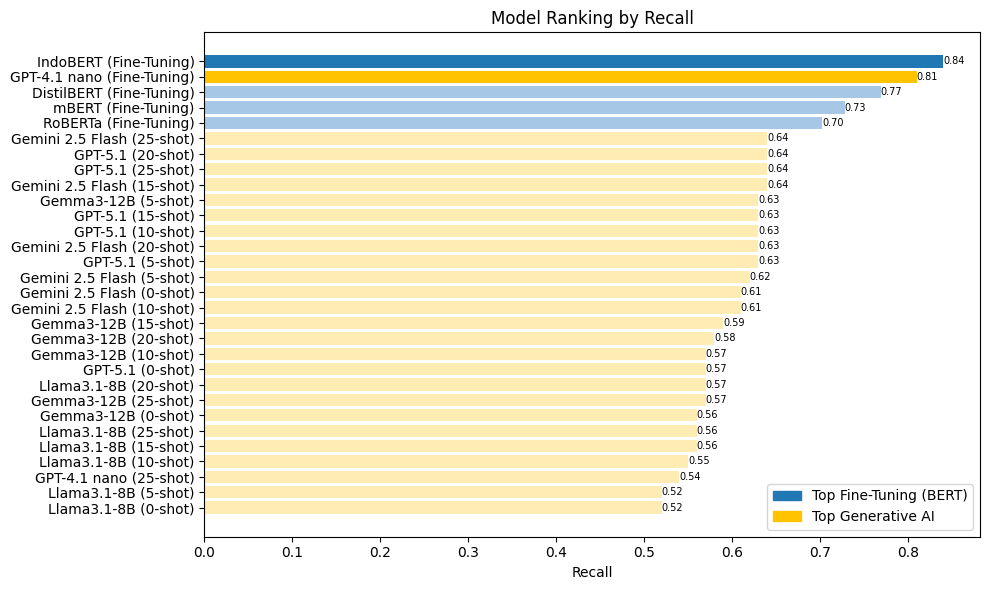

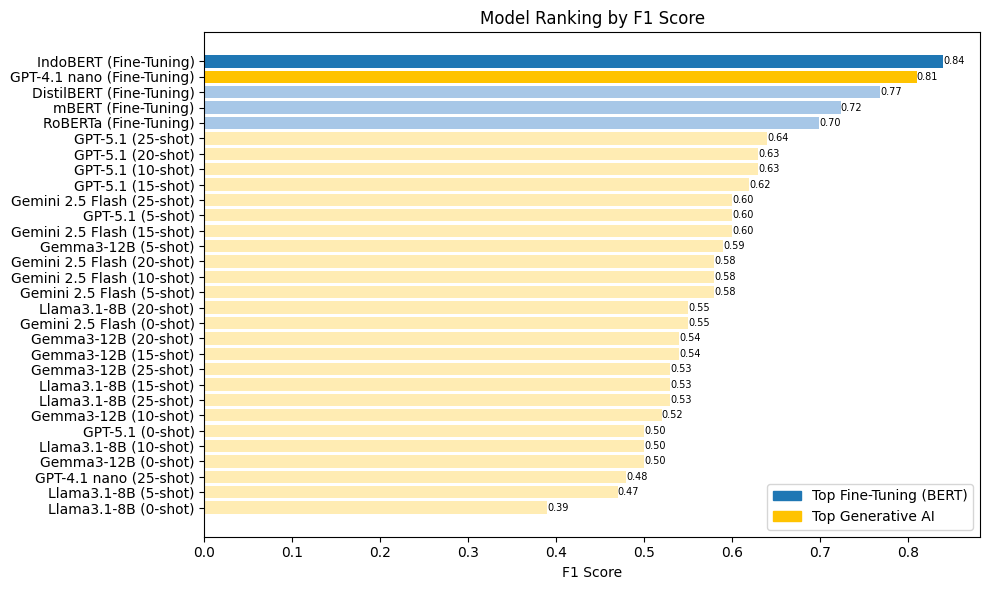

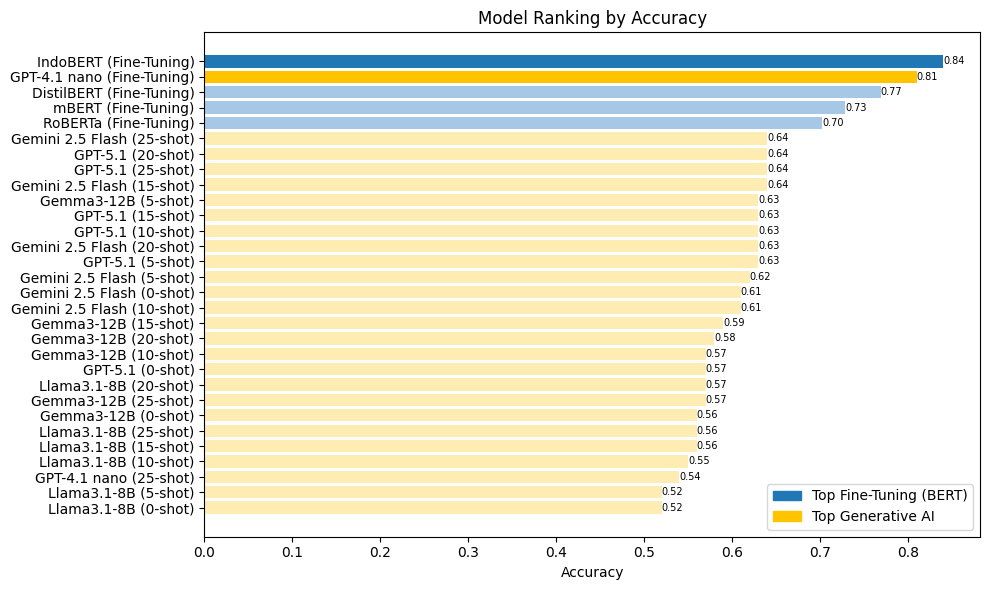

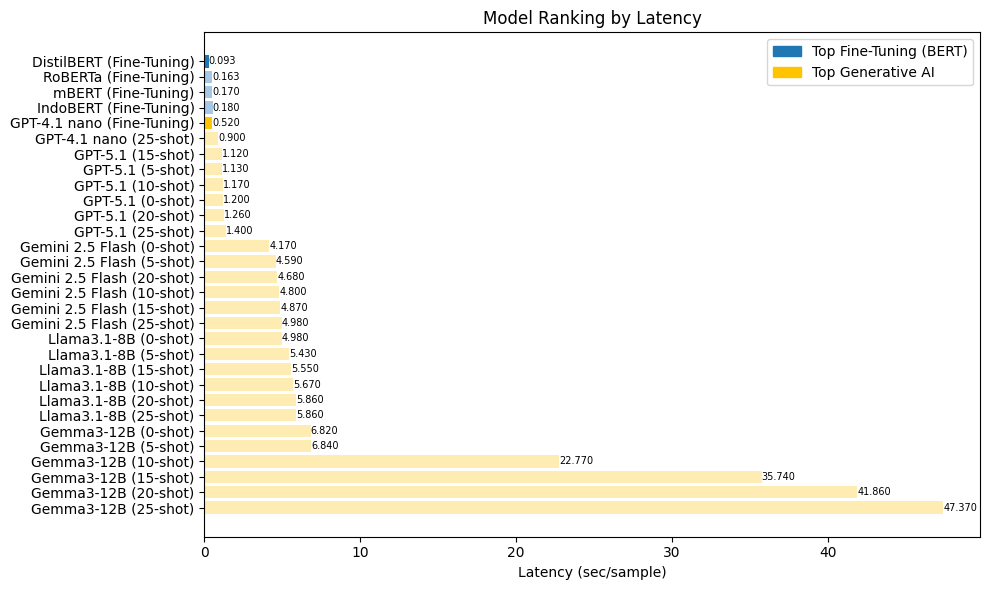

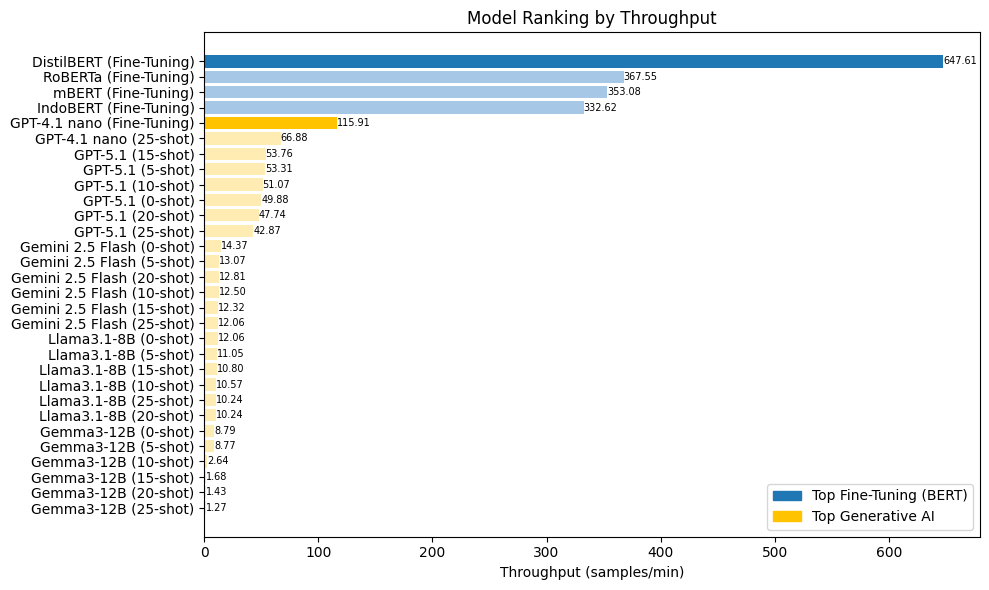

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

metrics = ["Precision", "Recall", "F1 Score", "Accuracy", "Latency", "Throughput"]

# Fungsi untuk sorting model
def sort_models(metric, df):
    if metric == "Latency":
        return df.sort_values(by=metric, ascending=True)
    else:
        return df.sort_values(by=metric, ascending=False)

# Kategori model
gen_ai_models = ["Gemini 2.5 Flash", "GPT-5.1", "Llama3.1-8B", "Gemma3-12B", "GPT-4.1 nano"]
fine_tune_bert_models = ["IndoBERT", "DistilBERT", "RoBERTa", "mBERT"]

for metric in metrics:
    df_metric = df_all[df_all[metric].notna()]
    df_sorted = sort_models(metric, df_metric)

    # =========================
    # Top model per kategori
    # =========================
    top_fine = df_sorted[
        df_sorted["Model"].str.contains('|'.join(fine_tune_bert_models))
    ].iloc[0]["Model"]

    top_gen = df_sorted[
        df_sorted["Model"].str.contains('|'.join(gen_ai_models))
    ].iloc[0]["Model"]

    best_overall_model = df_sorted.iloc[0]["Model"]

    # =========================
    # Panjang batang
    # =========================
    bar_values = []
    for i, m in enumerate(df_sorted["Model"]):
        val = df_sorted.iloc[i][metric]
        if metric == "Latency" and any(ft in m for ft in fine_tune_bert_models):
            val *= 3
        bar_values.append(val)

    # =========================
    # Warna batang (LOGIKA FINAL)
    # =========================
    bar_colors = []

    for m in df_sorted["Model"]:

        is_finetune_bert = any(ft in m for ft in fine_tune_bert_models)
        is_genai = any(gen in m for gen in gen_ai_models)

        # =========================
        # TOP Generative AI
        # =========================
        if is_genai and m == top_gen:
            bar_colors.append("#FFC300")

        # =========================
        # Fine-Tuning BERT
        # =========================
        elif is_finetune_bert:
            bar_colors.append("#1F77B4" if m == top_fine else "#A7C7E7")

        # =========================
        # Generative AI (non-top)
        # =========================
        elif is_genai:
            bar_colors.append("#FFECB3")

        else:
            bar_colors.append("#CCCCCC")

    # =========================
    # Plot
    # =========================
    plt.figure(figsize=(10, 6))
    plt.barh(df_sorted["Model"], bar_values, color=bar_colors)

    if metric == "Latency":
        plt.xlabel("Latency (sec/sample)")
    elif metric == "Throughput":
        plt.xlabel("Throughput (samples/min)")
    else:
        plt.xlabel(metric)

    plt.title(f"Model Ranking by {metric}")
    plt.gca().invert_yaxis()

    # Label nilai asli
    for i, val in enumerate(df_sorted[metric]):
        label = f"{val:.3f}" if metric == "Latency" else f"{val:.2f}"
        plt.text(bar_values[i], i, label, va="center", fontsize=7)

    # =========================
    # Legend (AKURAT)
    # =========================
    legend_patches = [
        mpatches.Patch(color="#1F77B4", label="Top Fine-Tuning (BERT)"),
        mpatches.Patch(color="#FFC300", label="Top Generative AI"),
    ]

    if metric == "Latency":
        plt.legend(handles=legend_patches, loc="upper right")
    else:
        plt.legend(handles=legend_patches, loc="lower right")

    plt.tight_layout()
    plt.show()

In [8]:
df_all_gen_ai = df_all[~df_all['Model'].str.contains('Fine-Tuning')].reset_index(drop=True)

In [9]:
df_all_gen_ai

,Model,N-Shot,Precision,Recall,F1 Score,Accuracy,Latency,Throughput
0,Gemini 2.5 Flash (0-shot),0.0,0.53,0.61,0.55,0.61,4.17,14.37
1,Gemini 2.5 Flash (5-shot),5.0,0.62,0.62,0.58,0.62,4.59,13.07
2,Gemini 2.5 Flash (10-shot),10.0,0.65,0.61,0.58,0.61,4.80,12.50
3,Gemini 2.5 Flash (15-shot),15.0,0.68,0.64,0.60,0.64,4.87,12.32
4,Gemini 2.5 Flash (20-shot),20.0,0.64,0.63,0.58,0.63,4.68,12.81
5,Gemini 2.5 Flash (25-shot),25.0,0.68,0.64,0.60,0.64,4.98,12.06
6,GPT-5.1 (0-shot),0.0,0.71,0.57,0.50,0.57,1.20,49.88
7,GPT-5.1 (5-shot),5.0,0.63,0.63,0.60,0.63,1.13,53.31
8,GPT-5.1 (10-shot),10.0,0.64,0.63,0.63,0.63,1.17,51.07
9,GPT-5.1 (15-shot),15.0,0.63,0.63,0.62,0.63,1.12,53.76


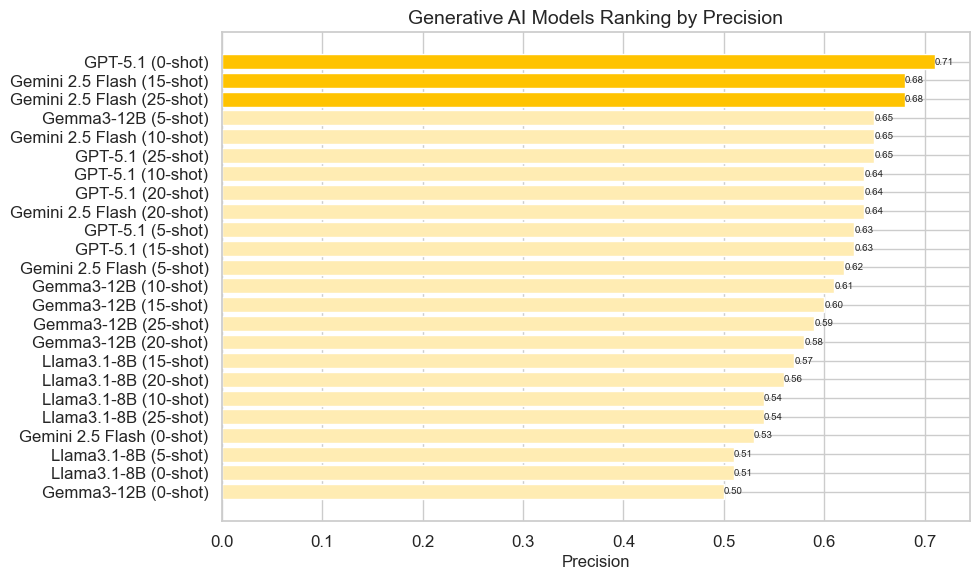

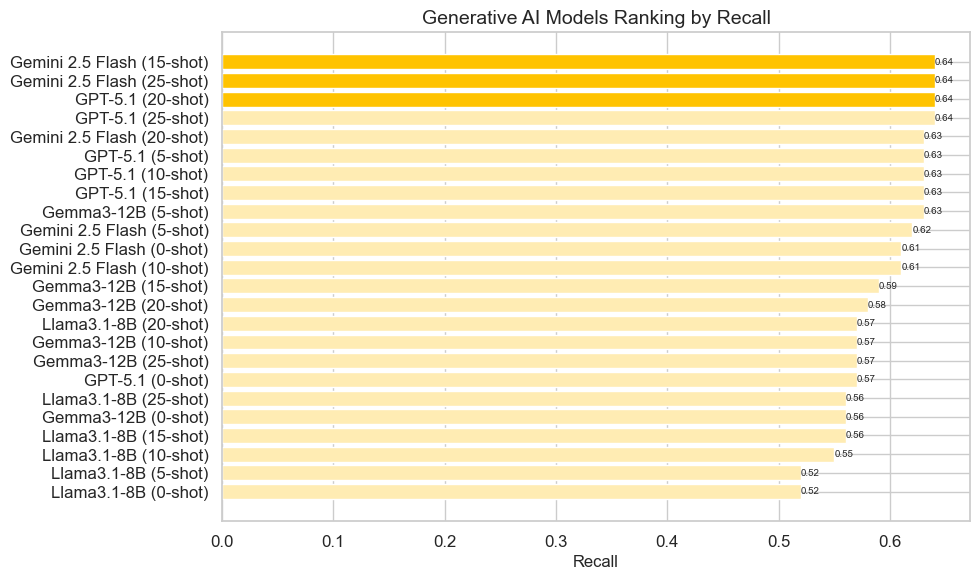

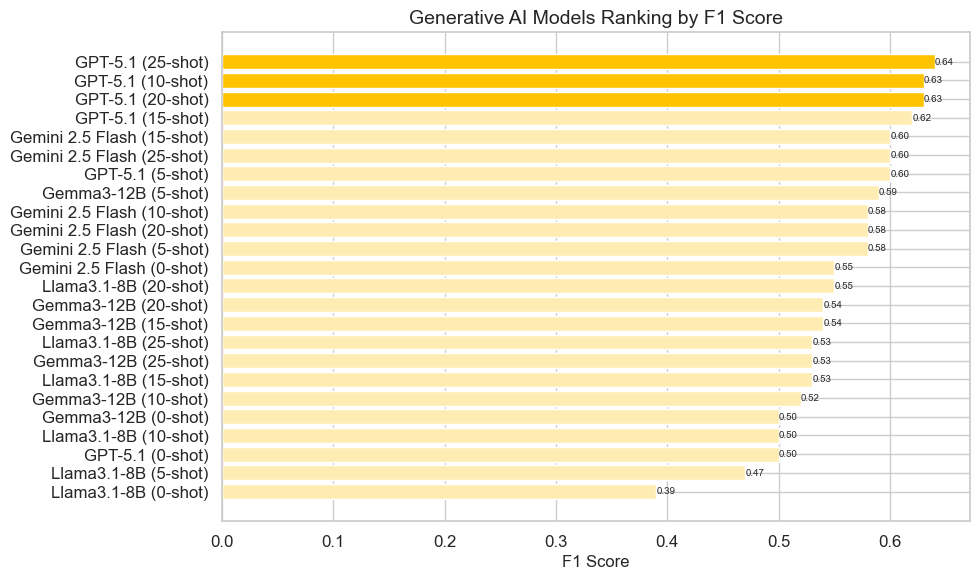

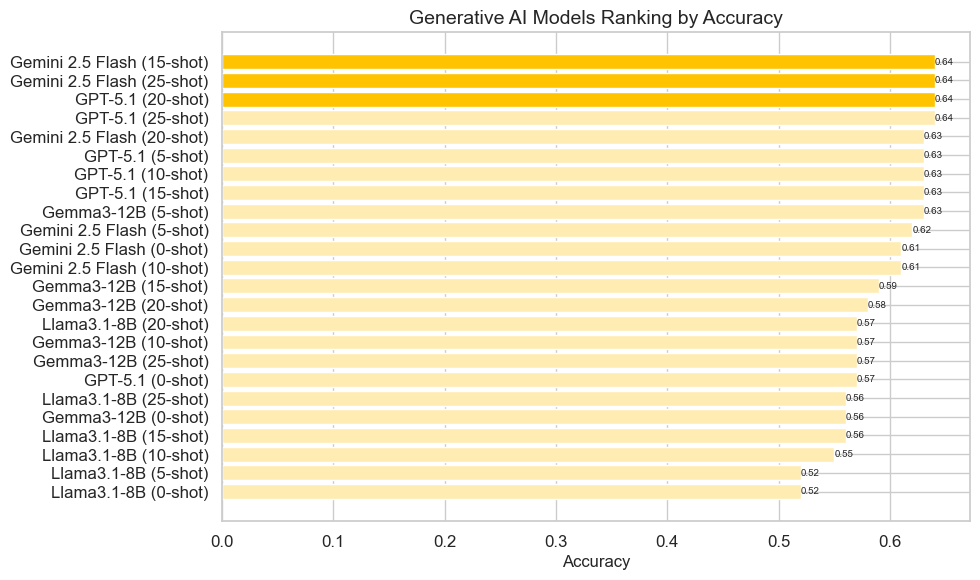

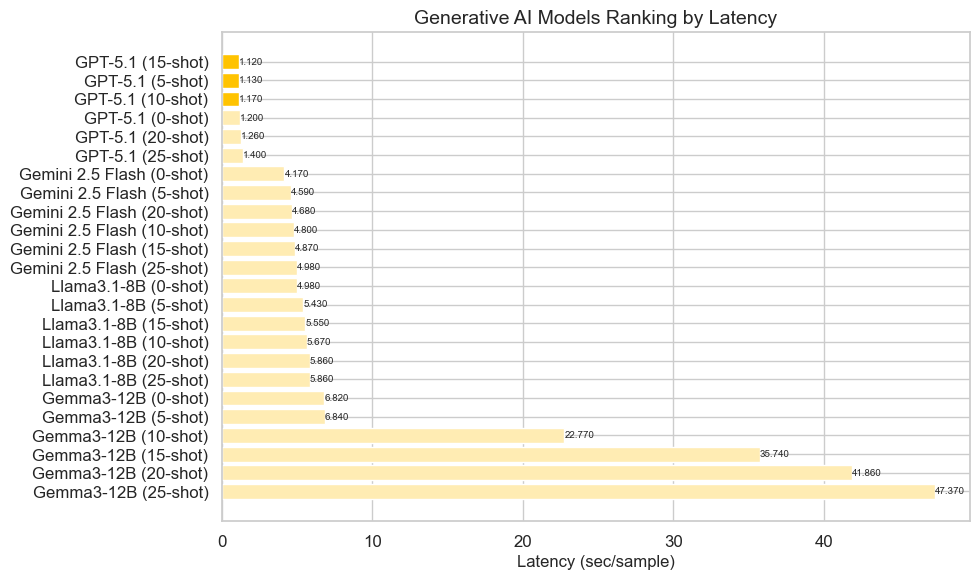

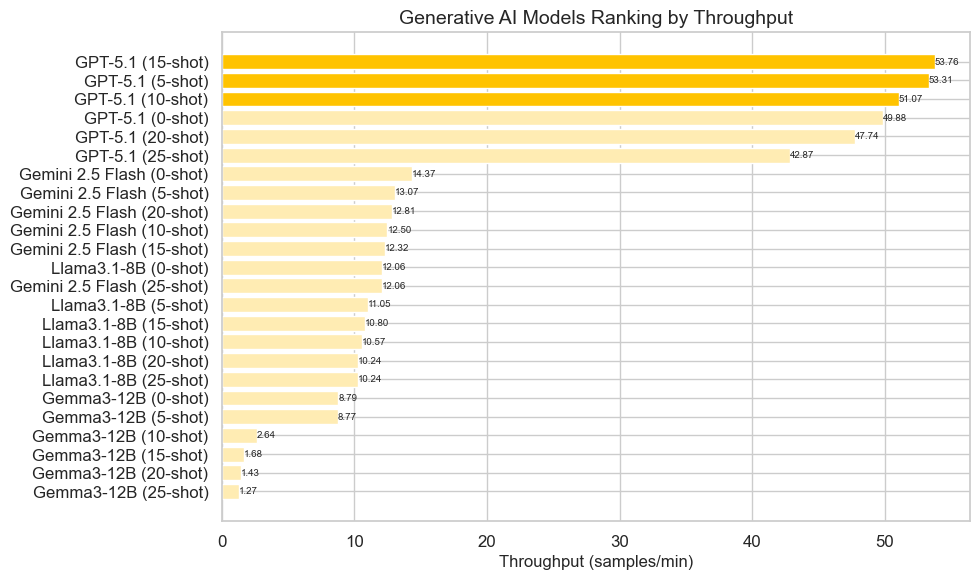

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Precision", "Recall", "F1 Score", "Accuracy", "Latency", "Throughput"]

def sort_models(metric, df):
    if metric == "Latency":
        return df.sort_values(by=metric, ascending=True)
    else:
        return df.sort_values(by=metric, ascending=False)

for metric in metrics:
    df_metric = df_all_gen_ai[df_all_gen_ai[metric].notna()]
    df_sorted = sort_models(metric, df_metric)

    top3_models = df_sorted["Model"][:3].tolist()

    top_color = '#FFC300'
    normal_color = '#FFECB3'

    bar_colors = [
        top_color if m in top3_models else normal_color
        for m in df_sorted["Model"]
    ]

    plt.figure(figsize=(10, 6))
    bars = plt.barh(df_sorted["Model"], df_sorted[metric], color=bar_colors)

    # ---- X Axis Label (with unit only here) ----
    if metric == "Latency":
        plt.xlabel("Latency (sec/sample)", fontsize=12)
    elif metric == "Throughput":
        plt.xlabel("Throughput (samples/min)", fontsize=12)
    else:
        plt.xlabel(metric, fontsize=12)

    plt.title(f"Generative AI Models Ranking by {metric}", fontsize=14)
    plt.tight_layout()

    # ---- Label values per bar (NO UNIT) ----
    for i, val in enumerate(df_sorted[metric]):
        if metric == "Latency":
            label = f"{val:.3f}"   # 3 decimals
        else:
            label = f"{val:.2f}"   # 2 decimals for others

        plt.text(val, i, label, va='center', ha='left',
                 fontsize=7)

    plt.gca().invert_yaxis()

    plt.show()

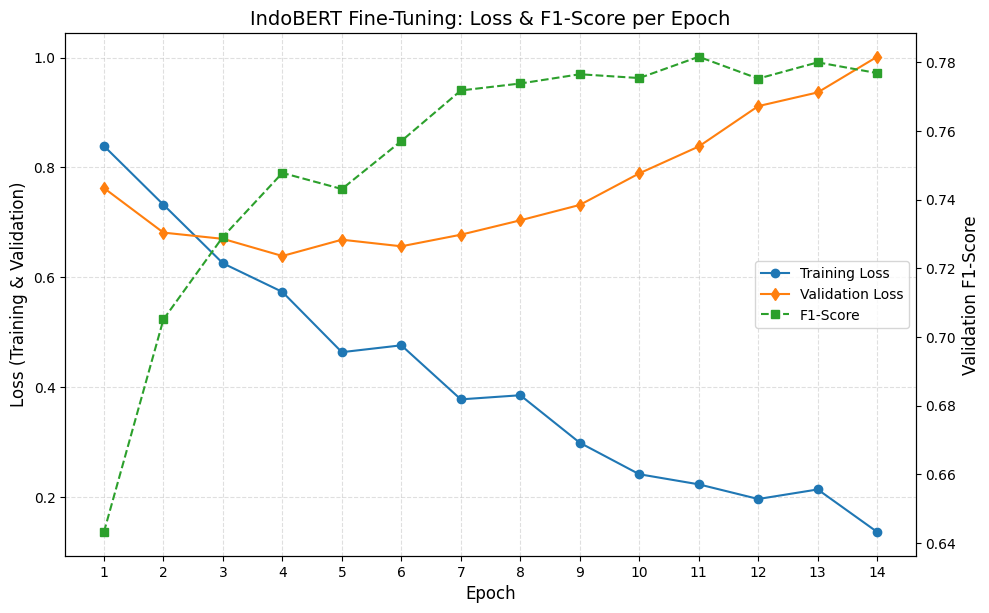

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data IndoBERT Fine-Tuning
data = {
    "Epoch": list(range(1, 15)),
    "Training Loss": [0.839100, 0.732200, 0.625500, 0.573400, 0.463700, 0.476200, 
                      0.377800, 0.385300, 0.298800, 0.241500, 0.223100, 0.196400, 
                      0.213800, 0.136400],
    "Validation Loss": [0.762499, 0.681369, 0.670010, 0.638792, 0.668457, 0.656448,
                        0.677534, 0.703745, 0.731761, 0.789213, 0.838138, 0.911616,
                        0.936589, 1.001504],
    "F1": [0.643218, 0.705107, 0.729156, 0.747775, 0.743081, 0.757055, 
           0.771784, 0.773814, 0.776506, 0.775397, 0.781600, 0.775235, 
           0.779970, 0.776840]
}

df = pd.DataFrame(data)

# Persiapan plot dengan sumbu Y ganda (twinx)
fig, ax1 = plt.subplots(figsize=(10,6))
x_axis = np.arange(1, 15)

# --- Sumbu Y Kiri (ax1): Loss ---
# Plot Training Loss
color_train = '#1F77B4' # Biru
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (Training & Validation)', fontsize=12)
ax1.plot(df["Epoch"], df["Training Loss"], marker='o', linestyle='-', label='Training Loss')

# Plot Validation Loss
color_val =  '#FF7F0E' # Oranye
ax1.plot(df["Epoch"], df["Validation Loss"], marker='d', linestyle='-', color=color_val, label='Validation Loss')
ax1.tick_params(axis='y') # Warna ticks Y1 tetap pada warna Loss

# --- Sumbu Y Kanan (ax2): F1-Score ---
ax2 = ax1.twinx()  
color_f1 = '#2CA02C' # Hijau
ax2.set_ylabel('Validation F1-Score', fontsize=12)
ax2.plot(df["Epoch"], df["F1"], marker='s', linestyle='--', color=color_f1, label='F1-Score')
ax2.tick_params(axis='y')

# Pengaturan tambahan
ax1.set_xticks(x_axis)
ax1.grid(True, linestyle='--', alpha=0.4)
fig.tight_layout()  
plt.title("IndoBERT Fine-Tuning: Loss & F1-Score per Epoch", fontsize=14)

# Menambahkan legend dari kedua sumbu
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right')

plt.show()

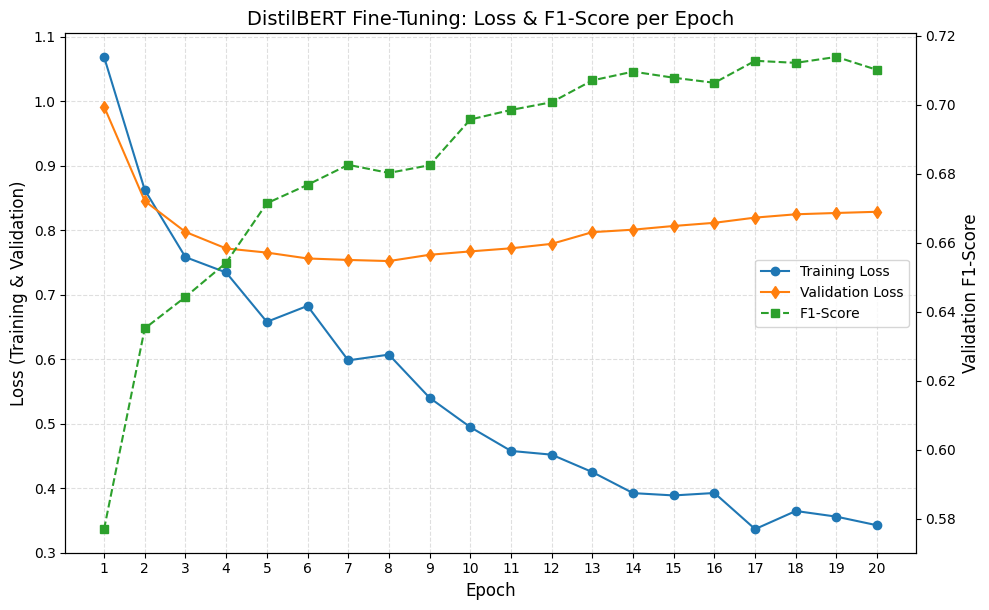

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data DistilBERT
data = {
    "Epoch": list(range(1, 21)),
    "Training Loss": [1.068500, 0.862300, 0.758100, 0.734300, 0.657800, 0.682500, 
                      0.598100, 0.607000, 0.540100, 0.494600, 0.457700, 0.451900, 
                      0.424900, 0.392300, 0.388700, 0.392500, 0.336500, 0.364600, 
                      0.355800, 0.342400],
    "Validation Loss": [0.991542, 0.845164, 0.797177, 0.771570, 0.765168, 0.756049, 
                        0.753757, 0.752014, 0.761753, 0.766994, 0.771804, 0.778696, 
                        0.796813, 0.800655, 0.806411, 0.811322, 0.819386, 0.824519, 
                        0.826568, 0.828421],
    "F1": [0.577052, 0.635192, 0.644318, 0.654219, 0.671468, 0.676807, 0.682606, 
           0.680259, 0.682491, 0.695740, 0.698503, 0.700741, 0.707065, 0.709609, 
           0.707843, 0.706373, 0.712747, 0.712154, 0.713878, 0.710102]
}

df = pd.DataFrame(data)

# Persiapan plot dengan sumbu Y ganda (twinx)
fig, ax1 = plt.subplots(figsize=(10,6))
x_axis = np.arange(1, 21)

# --- Sumbu Y Kiri (ax1): Loss ---
# Plot Training Loss
color_train = '#1F77B4' # Biru
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (Training & Validation)', fontsize=12)
ax1.plot(df["Epoch"], df["Training Loss"], marker='o', linestyle='-', label='Training Loss')

# Plot Validation Loss
color_val =  '#FF7F0E' # Oranye
ax1.plot(df["Epoch"], df["Validation Loss"], marker='d', linestyle='-', color=color_val, label='Validation Loss')
ax1.tick_params(axis='y') # Warna ticks Y1 tetap pada warna Loss

# --- Sumbu Y Kanan (ax2): F1-Score ---
ax2 = ax1.twinx()  
color_f1 = '#2CA02C' # Hijau
ax2.set_ylabel('Validation F1-Score', fontsize=12)
ax2.plot(df["Epoch"], df["F1"], marker='s', linestyle='--', color=color_f1, label='F1-Score')
ax2.tick_params(axis='y')

# Pengaturan tambahan
ax1.set_xticks(x_axis)
ax1.grid(True, linestyle='--', alpha=0.4)
fig.tight_layout()  
plt.title("DistilBERT Fine-Tuning: Loss & F1-Score per Epoch", fontsize=14)

# Menambahkan legend dari kedua sumbu
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right')

plt.show()


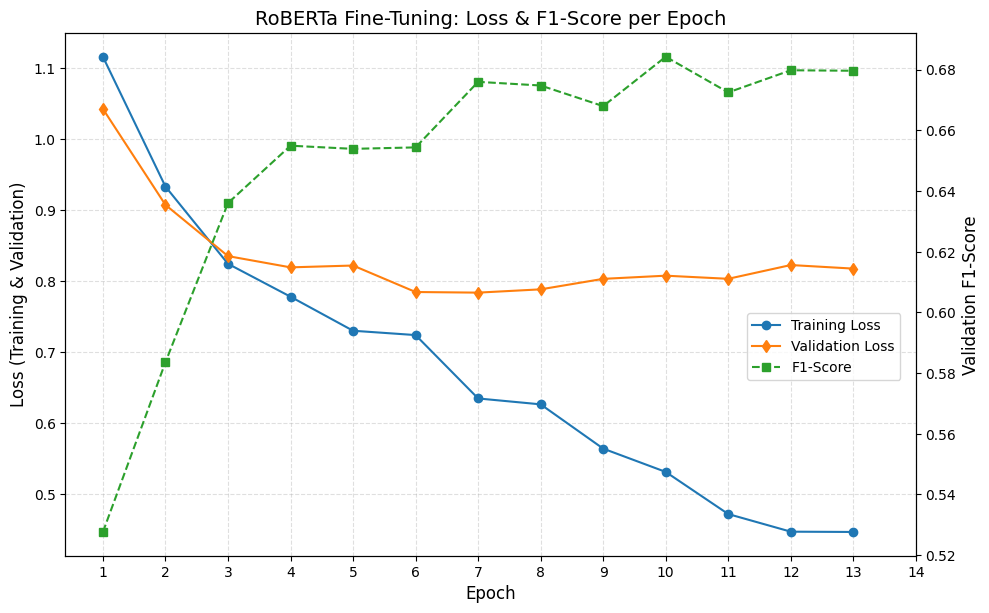

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data RoBERTa
data = {
    "Epoch": list(range(1, 14)),
    "Training Loss": [1.115400, 0.932700, 0.824000, 0.777700, 0.729800, 0.723700, 
                      0.634500, 0.626200, 0.563900, 0.531100, 0.471800, 0.447000, 
                      0.446600],
    "Validation Loss": [1.042034, 0.906940, 0.834841, 0.819003, 0.821575, 0.784302, 
                        0.783437, 0.788061, 0.802827, 0.807286, 0.802895, 0.822274, 
                        0.817248],
    "F1": [0.527647, 0.583575, 0.636024, 0.654930, 0.653892, 0.654372, 0.675970,
           0.674767, 0.667967, 0.684238, 0.672487, 0.679786, 0.679630]
}

df = pd.DataFrame(data)

# Persiapan plot dengan sumbu Y ganda (twinx)
fig, ax1 = plt.subplots(figsize=(10,6))
x_axis = np.arange(1, 15)

# --- Sumbu Y Kiri (ax1): Loss ---
# Plot Training Loss
color_train = '#1F77B4' # Biru
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (Training & Validation)', fontsize=12)
ax1.plot(df["Epoch"], df["Training Loss"], marker='o', linestyle='-', label='Training Loss')

# Plot Validation Loss
color_val =  '#FF7F0E' # Oranye
ax1.plot(df["Epoch"], df["Validation Loss"], marker='d', linestyle='-', color=color_val, label='Validation Loss')
ax1.tick_params(axis='y') # Warna ticks Y1 tetap pada warna Loss

# --- Sumbu Y Kanan (ax2): F1-Score ---
ax2 = ax1.twinx()  
color_f1 = '#2CA02C' # Hijau
ax2.set_ylabel('Validation F1-Score', fontsize=12)
ax2.plot(df["Epoch"], df["F1"], marker='s', linestyle='--', color=color_f1, label='F1-Score')
ax2.tick_params(axis='y')

# Pengaturan tambahan
ax1.set_xticks(x_axis)
ax1.grid(True, linestyle='--', alpha=0.4)
fig.tight_layout()  
plt.title("RoBERTa Fine-Tuning: Loss & F1-Score per Epoch", fontsize=14)

# Menambahkan legend dari kedua sumbu
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right', bbox_to_anchor=(0.99, 0.40))

plt.show()


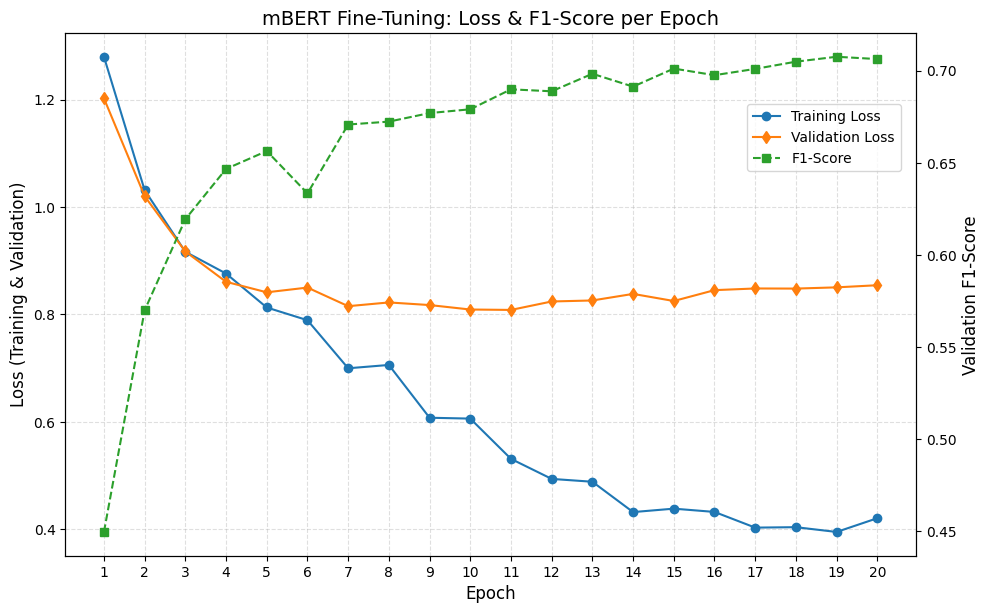

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data mBERT
data = {
    "Epoch": list(range(1, 21)),
    "Training Loss": [1.279600, 1.031100, 0.916400, 0.875900, 0.812700, 0.789000,
                      0.699500, 0.705700, 0.607400, 0.605800, 0.530800, 0.493500,
                      0.488200, 0.431700, 0.438100, 0.432000, 0.402800, 0.403600,
                      0.394700, 0.420300],
    "Validation Loss": [1.202229, 1.019949, 0.917004, 0.860526, 0.840968, 0.849778,
                        0.815143, 0.822110, 0.817238, 0.808923, 0.808167, 0.823887,
                        0.825782, 0.838004, 0.824781, 0.844982, 0.848120, 0.847910,
                        0.850189, 0.854152],
    "F1": [0.449677, 0.569944, 0.619355, 0.646631, 0.656334, 0.633385,
           0.670730, 0.672306, 0.676941, 0.679001, 0.689826, 0.688756,
           0.698268, 0.691293, 0.701083, 0.697498, 0.700908, 0.704823,
           0.707495, 0.706244]
}

df = pd.DataFrame(data)

# Persiapan plot dengan sumbu Y ganda (twinx)
fig, ax1 = plt.subplots(figsize=(10,6))
x_axis = np.arange(1, 21)

# --- Sumbu Y Kiri (ax1): Loss ---
# Plot Training Loss
color_train = '#1F77B4' # Biru
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (Training & Validation)', fontsize=12)
ax1.plot(df["Epoch"], df["Training Loss"], marker='o', linestyle='-', label='Training Loss')

# Plot Validation Loss
color_val =  '#FF7F0E' # Oranye
ax1.plot(df["Epoch"], df["Validation Loss"], marker='d', linestyle='-', color=color_val, label='Validation Loss')
ax1.tick_params(axis='y') # Warna ticks Y1 tetap pada warna Loss

# --- Sumbu Y Kanan (ax2): F1-Score ---
ax2 = ax1.twinx()  
color_f1 = '#2CA02C' # Hijau
ax2.set_ylabel('Validation F1-Score', fontsize=12)
ax2.plot(df["Epoch"], df["F1"], marker='s', linestyle='--', color=color_f1, label='F1-Score')
ax2.tick_params(axis='y')

# Pengaturan tambahan
ax1.set_xticks(x_axis)
ax1.grid(True, linestyle='--', alpha=0.4)
fig.tight_layout()  
plt.title("mBERT Fine-Tuning: Loss & F1-Score per Epoch", fontsize=14)

# Menambahkan legend dari kedua sumbu
# naik ke atas sedikit
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right', bbox_to_anchor=(0.99, 0.80))

plt.show()


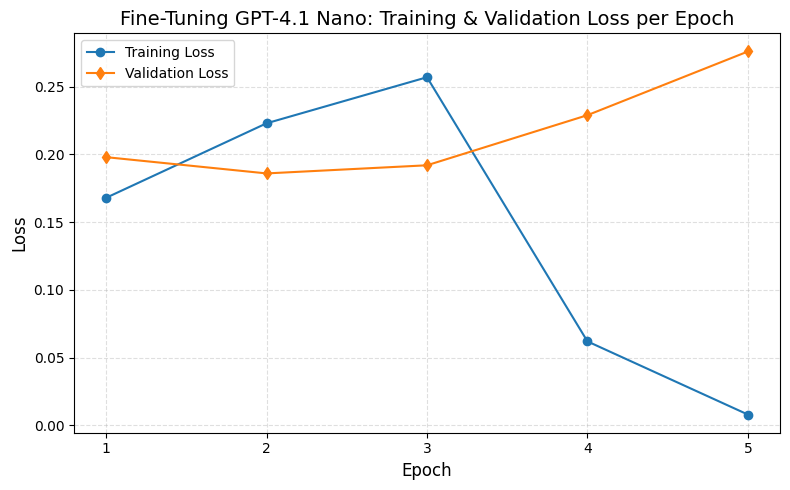

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# =========================
# Data Fine-Tuning GPT-4.1 Nano
# =========================
data = {
    "Epoch": [1, 2, 3, 4, 5],
    "Training Loss": [0.168, 0.223, 0.257, 0.062, 0.008],
    "Validation Loss": [0.198, 0.186, 0.192, 0.229, 0.276]
}

df = pd.DataFrame(data)

# =========================
# Plot Loss per Epoch
# =========================
plt.figure(figsize=(8, 5))

# Training Loss
plt.plot(
    df["Epoch"],
    df["Training Loss"],
    marker='o',
    linestyle='-',
    label='Training Loss'
)

# Validation Loss
plt.plot(
    df["Epoch"],
    df["Validation Loss"],
    marker='d',
    linestyle='-',
    label='Validation Loss'
)

# Pengaturan plot
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Fine-Tuning GPT-4.1 Nano: Training & Validation Loss per Epoch", fontsize=14)
plt.xticks(df["Epoch"])
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()

plt.show()
